58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,982,474 (57.15 MB)

 Trainable params: 267,786 (1.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

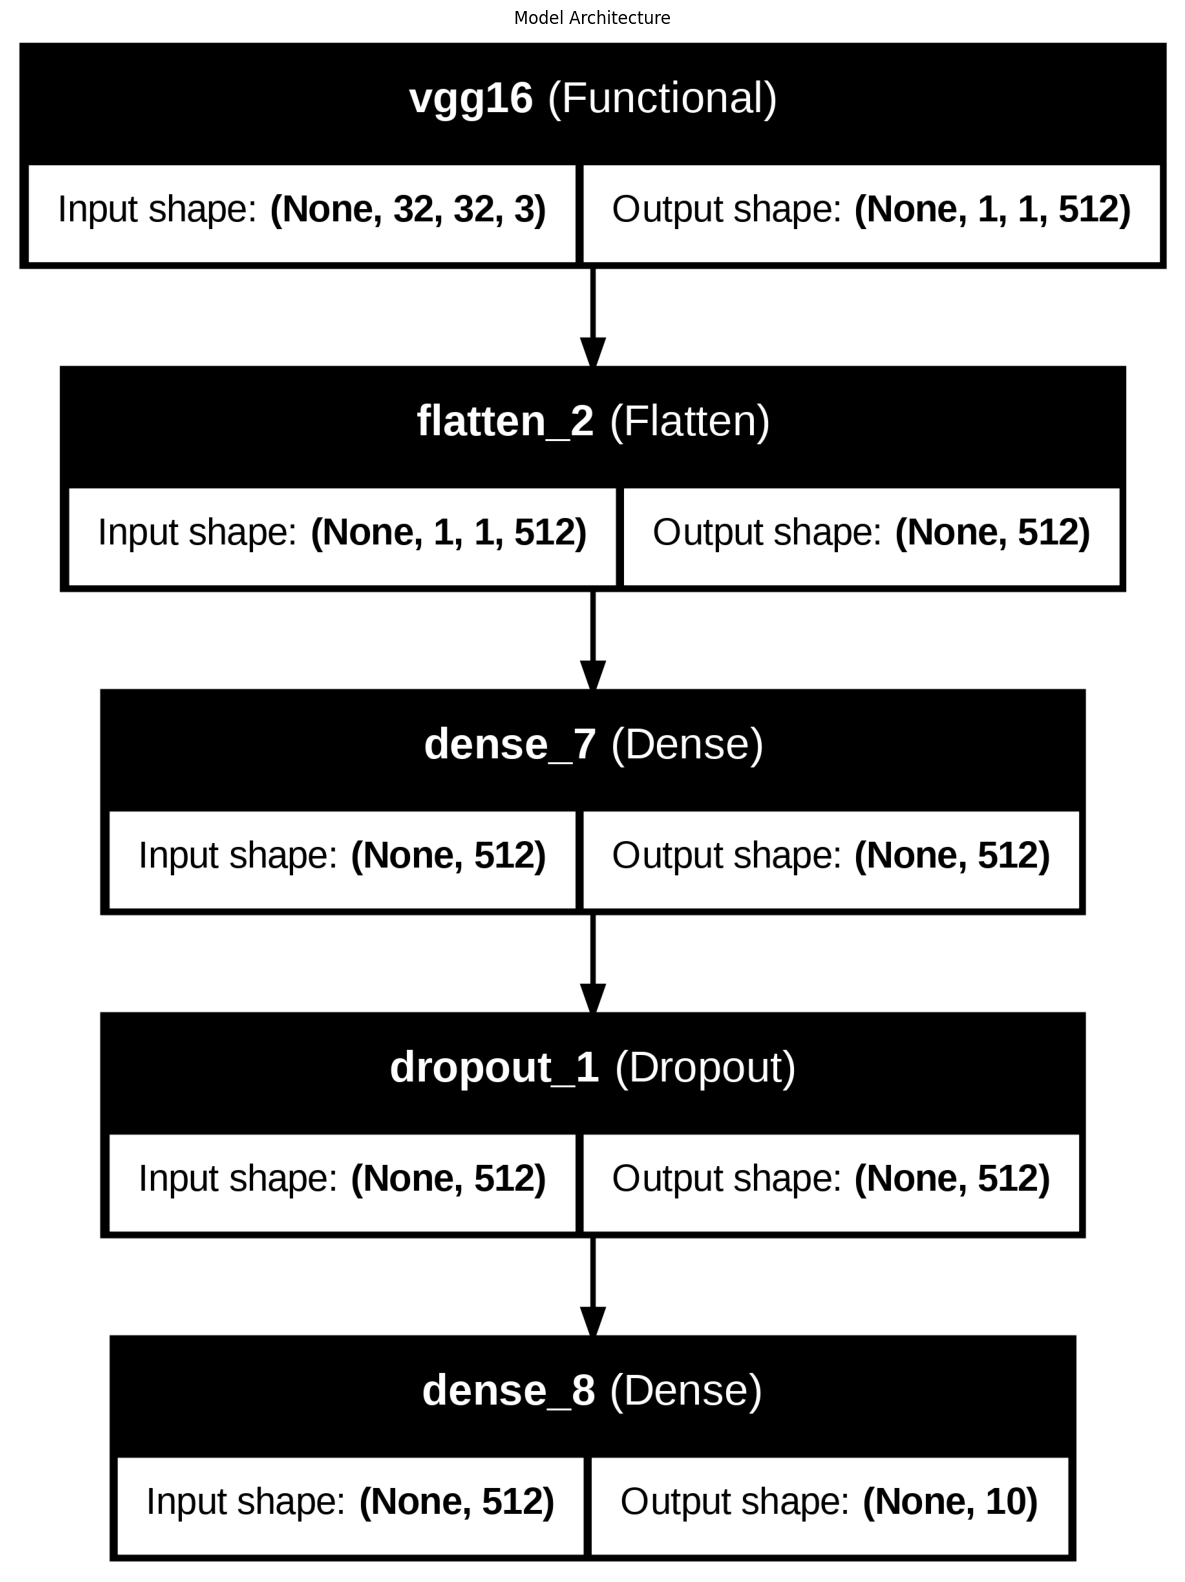

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 631s 504ms/step - accuracy: 0.2777 - loss: 2.0327 - val_accuracy: 0.4973 - val_loss: 1.4725
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 680s 502ms/step - accuracy: 0.4860 - loss: 1.4966 - val_accuracy: 0.5339 - val_loss: 1.3549
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 681s 502ms/step - accuracy: 0.5182 - loss: 1.3874 - val_accuracy: 0.5519 - val_loss: 1.2976
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 598s 478ms/step - accuracy: 0.5362 - loss: 1.3333 - val_accuracy: 0.5673 - val_loss: 1.2656
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 623s 498ms/step - accuracy: 0.5547 - loss: 1.2901 - val_accuracy: 0.5678 - val_loss: 1.2382
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 682s 498ms/step - accuracy: 0.5661 - loss: 1.2490 - val_accuracy: 0.5787 - val_loss: 1.2208
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 625s 500ms/step - accuracy: 0.5779 - loss: 1.2184 - val_accuracy: 0.5808 - val_loss: 1.2011
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 624s 499ms/step - ac

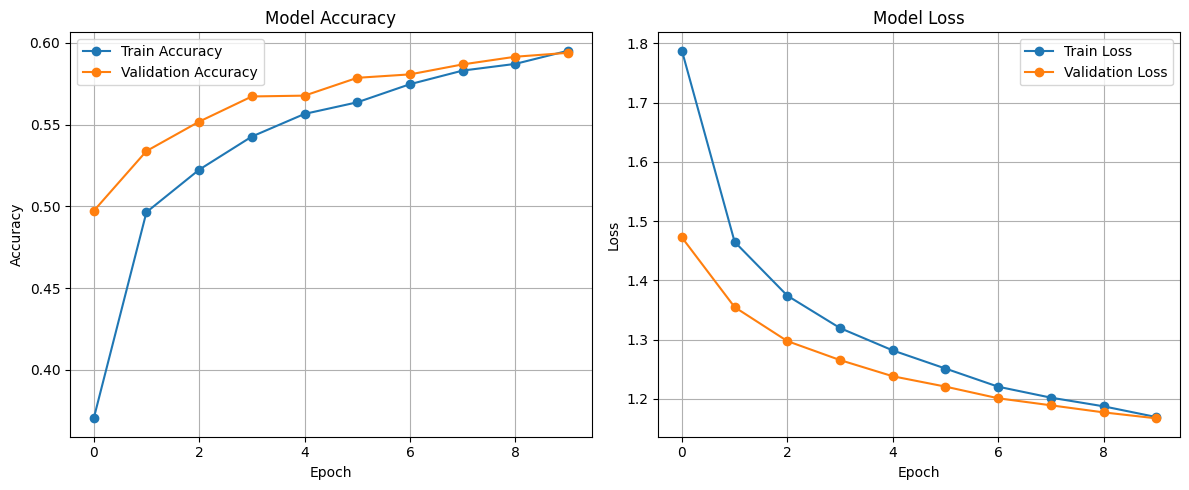

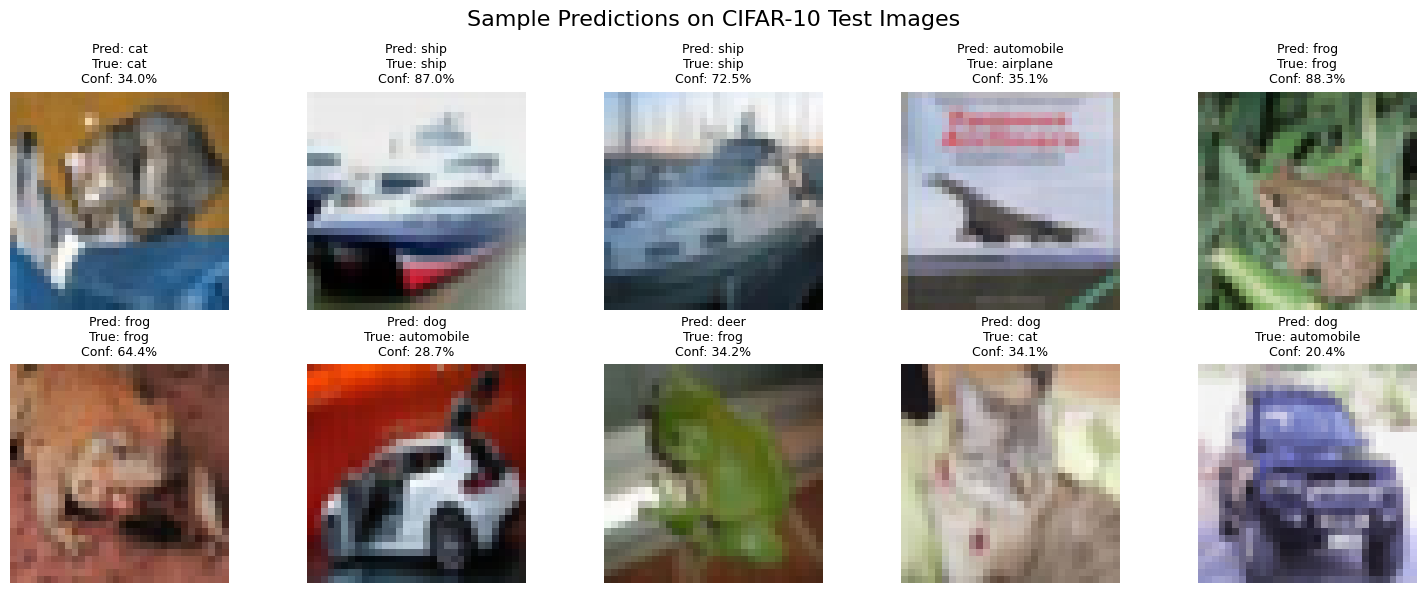

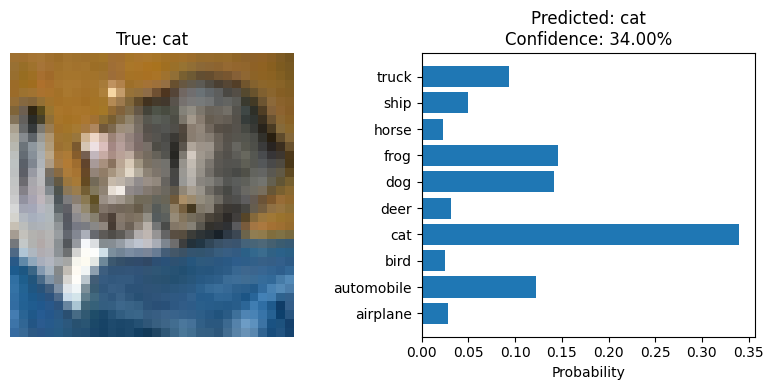

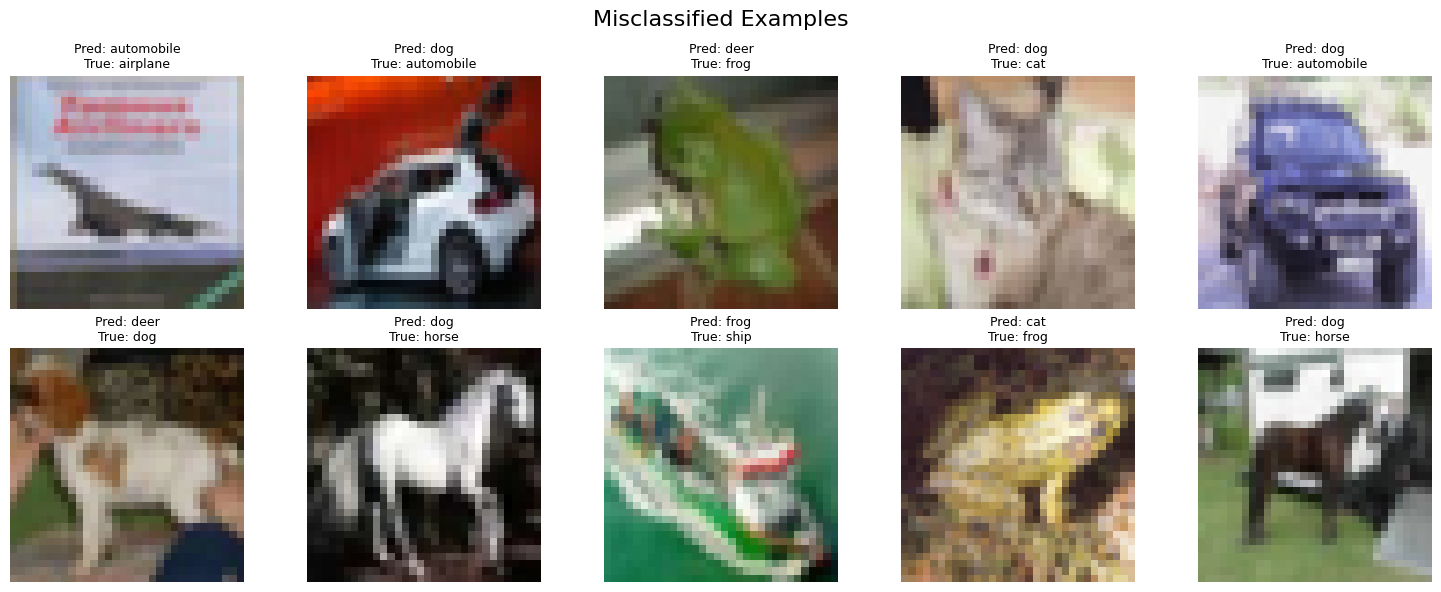

In [4]:
# First install required packages
# conda install -c conda-forge python-graphviz -y
# pip install pydot

import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# VGG16 expects 224x224 images, but CIFAR-10 is 32x32
# We'll use it as-is but performance might be limited
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze all layers in the base model
for layer in vgg_base.layers:
    layer.trainable = False

# Build the model
model = Sequential()
model.add(vgg_base)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()

# Plot model architecture (requires graphviz and pydot)
try:
    plot_model(model, to_file='cnn.png', show_shapes=True,
               show_layer_names=True, dpi=300)

    plt.figure(figsize=(20, 20))
    img = plt.imread('cnn.png')
    plt.imshow(img)
    plt.axis('off')
    plt.title('Model Architecture')
    plt.show()
except ImportError:
    print("Graphviz or pydot not installed. Skipping model visualization.")
except Exception as e:
    print(f"Error plotting model: {e}")

# Train the model
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'\nTest Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc * 100:.2f}%')

# Plot training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Make predictions and visualize
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Predict on multiple samples
num_samples = 10
plt.figure(figsize=(15, 6))
plt.suptitle('Sample Predictions on CIFAR-10 Test Images', fontsize=16)

for i in range(num_samples):
    sample = x_test[i].reshape(1, 32, 32, 3)
    prediction = model.predict(sample, verbose=0)
    predicted_class = np.argmax(prediction)
    true_class = y_test[i][0]
    confidence = np.max(prediction) * 100

    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i])
    plt.title(f"Pred: {class_names[predicted_class]}\nTrue: {class_names[true_class]}\nConf: {confidence:.1f}%",
              fontsize=9)
    plt.axis('off')

    # Color code based on correctness
    if predicted_class == true_class:
        plt.gca().patch.set_edgecolor('green')
    else:
        plt.gca().patch.set_edgecolor('red')
    plt.gca().patch.set_linewidth(2)

plt.tight_layout()
plt.show()

# Additional: Show prediction confidence for a specific sample
sample_idx = 0
sample = x_test[sample_idx].reshape(1, 32, 32, 3)
prediction = model.predict(sample, verbose=0)
predicted_class = np.argmax(prediction)
true_class = y_test[sample_idx][0]
confidence = np.max(prediction) * 100

plt.figure(figsize=(8, 4))

# Show image
plt.subplot(1, 2, 1)
plt.imshow(x_test[sample_idx])
plt.title(f"True: {class_names[true_class]}")
plt.axis('off')

# Show prediction probabilities
plt.subplot(1, 2, 2)
plt.barh(class_names, prediction[0])
plt.xlabel('Probability')
plt.title(f'Predicted: {class_names[predicted_class]}\nConfidence: {confidence:.2f}%')
plt.tight_layout()
plt.show()

# Show some misclassified examples
predictions = model.predict(x_test, verbose=0)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = y_test.flatten()

misclassified_idx = np.where(predicted_classes != true_classes)[0]
if len(misclassified_idx) > 0:
    num_misclassified = min(10, len(misclassified_idx))
    plt.figure(figsize=(15, 6))
    plt.suptitle('Misclassified Examples', fontsize=16)

    for i, idx in enumerate(misclassified_idx[:num_misclassified]):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x_test[idx])
        plt.title(f"Pred: {class_names[predicted_classes[idx]]}\nTrue: {class_names[true_classes[idx]]}",
                 fontsize=9)
        plt.axis('off')
        plt.gca().patch.set_edgecolor('red')
        plt.gca().patch.set_linewidth(2)

    plt.tight_layout()
    plt.show()